# Random Forest Implementatoion

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)

df_train =  pd.read_csv('../../data/F_feature_selection/feature_selection-2022.csv', sep=';')
df_test = pd.df_test = pd.read_csv('../../data/F_feature_selection/feature_selection-2023.csv', sep=';')
df_val = pd.read_csv('../../data/F_feature_selection/feature_selection-2019.csv', sep=';')

In [21]:
df_test.head()


,location,type_of_collision,latitude,longitude,reserved_lane_present,horizontal_alignment,infrastructure,accident_situation,speed_limit,position,sex,pedestrian_location,pedestrian_action,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler,hour_sin,hour_cos,time_of_day,day_of_week,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos,age,age_group,used_belt,used_helmet,used_child_restraint,used_airbag,vehicle_category_simplified,impact_score,vehicle_category_simplified_other,impact_score_other,impact_delta,road_complexity_index,surface_quality_indicator,role,lighting_ordinal,weather_ordinal,injury_target
0,2,7,48.866386,2.323471,0,1,0,1,30,1,1,-1,-1,0,0,5,1,1,-1,-1,-1,-1,-1,0,0,0,0,0,1,1.000000,6.123234e-17,Morning_Rush,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,45,middle_aged,0,1,0,0,powered_2_3_wheeler,3,none,1,2,3.750000,0,driver,0,2,1
1,2,6,48.845478,2.428681,2,1,0,1,50,1,2,-1,-1,0,1,1,1,1,-1,-1,-1,-1,-1,0,0,0,1,0,0,0.965926,2.588190e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,26,adult,1,0,0,0,light_motor_vehicle,4,none,1,3,4.166667,0,driver,1,3,0
2,2,6,48.845478,2.428681,2,1,0,1,50,10,1,2,3,-1,-1,-1,-1,-1,0,1,1,1,1,0,0,0,1,0,0,0.965926,2.588190e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,26,adult,0,0,0,0,unknown,1,light_motor_vehicle,4,-3,4.166667,0,pedestrian,1,3,2
3,2,1,48.762400,2.406550,0,1,5,1,50,1,1,0,0,0,2,1,16,1,0,2,2,15,1,0,0,0,1,0,1,-0.866025,5.000000e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,36,adult,0,1,0,0,powered_2_3_wheeler,3,light_motor_vehicle,4,-1,5.833333,0,driver,0,2,2
4,2,1,48.762400,2.406550,0,1,5,1,50,1,2,0,0,0,2,2,15,1,0,2,1,16,1,0,0,0,1,0,1,-0.866025,5.000000e-01,Night,6,-0.781831,0.62349,0.5,-0.866025,0.817401,-0.576069,39,adult,1,0,0,0,light_motor_vehicle,4,powered_2_3_wheeler,3,1,5.833333,0,driver,0,2,0


In [22]:
columns_to_drop = [
    'latitude', 'longitude',
    'pedestrian_location', 'pedestrian_action',
    'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'age',
]

object_type = ['role', 'age_group', 'vehicle_category_simplified', 'vehicle_category_simplified_other', 'time_of_day']

na_with_meaning = [
    'fixed_obstacle_struck', 'mobile_obstacle_struck', 'initial_point_of_impact', 'main_maneuver_before_accident', 'motor_type',
    'fixed_obstacle_struck_other', 'mobile_obstacle_struck_other', 'initial_point_of_impact_other', 'main_maneuver_before_accident_other', 'motor_type_other',
    'sex', 
    
    #'pedestrian_location', 'pedestrian_action'
]

columns_to_int32 = [
    'location', 'type_of_collision', 'reserved_lane_present', 'horizontal_alignment', 'infrastructure', 'accident_situation', 'position',
    'fixed_obstacle_struck', 'mobile_obstacle_struck', 'initial_point_of_impact', 'main_maneuver_before_accident', 'motor_type', 
    'fixed_obstacle_struck_other', 'mobile_obstacle_struck_other', 'initial_point_of_impact_other', 'main_maneuver_before_accident_other',
    'motor_type_other','vehicle_category_involved_bicycle', 'vehicle_category_involved_bus_coach', 'vehicle_category_involved_hgv_truck',
    'vehicle_category_involved_light_motor_vehicle', 'vehicle_category_involved_other', 'vehicle_category_involved_powered_2_3_wheeler',
    'used_belt', 'used_helmet', 'used_child_restraint', 'used_airbag', 'impact_score', 'impact_score_other', 'impact_delta', 'surface_quality_indicator',
    'lighting_ordinal', 'weather_ordinal', 'injury_target', 'sex', 'day_of_week', 'speed_limit'
]

In [ ]:
for x in [df_train, df_test, df_val]:
    # Remove rows or columns with missing values that do not encode info.
    x.drop(columns=columns_to_drop, inplace=True)    
    x.replace(-1, pd.NA, inplace=True)
    x[na_with_meaning] = x[na_with_meaning].fillna(-1)
    x[['vehicle_category_simplified', 'vehicle_category_simplified_other']] = x[['vehicle_category_simplified', 'vehicle_category_simplified_other']].fillna('no vehicle')
    x.dropna(inplace=True)
    x[columns_to_int32] = x[columns_to_int32].astype('int32')
    
    # Drop rows with impossible speed limit
    # France has a maximum speed limit of 130it
    x.drop(index=x[x['speed_limit'] > 130].index, inplace=True)

C:\Users\Aaron Niemesch\AppData\Local\Temp\ipykernel_24080\4284401012.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x[na_with_meaning] = x[na_with_meaning].fillna(-1)
C:\Users\Aaron Niemesch\AppData\Local\Temp\ipykernel_24080\4284401012.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x[na_with_meaning] = x[na_with_meaning].fillna(-1)
C:\Users\Aaron Niemesch\AppData\Local\Temp\ipykernel_24080\4284401012.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.i

In [24]:
num_cols = ['speed_limit', 'day_of_week', 'impact_score', 'impact_score_other', 'impact_delta', 'road_complexity_index', 'surface_quality_indicator', 'lighting_ordinal', 'weather_ordinal', 'vehicle_category_involved_bicycle', 'vehicle_category_involved_bus_coach', 'vehicle_category_involved_hgv_truck','vehicle_category_involved_light_motor_vehicle', 'vehicle_category_involved_other', 'vehicle_category_involved_powered_2_3_wheeler']

cat_cols = df_train.columns.difference(num_cols + ['injury_target'])

In [26]:
X_train = df_train.drop(columns='injury_target')
y_train = df_train['injury_target']

X_test = df_test.drop(columns='injury_target')
y_test = df_test['injury_target']

x_val = df_val.drop(columns='injury_target')
y_val = df_val['injury_target']

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108527 entries, 1 to 126243
Data columns (total 43 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   location                                       108527 non-null  int32  
 1   type_of_collision                              108527 non-null  int32  
 2   reserved_lane_present                          108527 non-null  int32  
 3   horizontal_alignment                           108527 non-null  int32  
 4   infrastructure                                 108527 non-null  int32  
 5   accident_situation                             108527 non-null  int32  
 6   speed_limit                                    108527 non-null  int32  
 7   position                                       108527 non-null  int32  
 8   sex                                            108527 non-null  int32  
 9   fixed_obstacle_struck                     

In [54]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

# 1) Preprocessor: numerisch → MinMaxScaler (0–1), kategorisch → OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),                         # skaliert num_cols auf [0, 1]
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  # one-hot für cat_cols
    ]
)

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", MinMaxScaler(), num_cols),  # numerische Spalten skalieren (0–1)
#         ("cat", OrdinalEncoder(
#             handle_unknown="use_encoded_value",
#             unknown_value=-1
#         ), cat_cols),                       # kategorische Spalten → Codes (kein One-Hot!)
#     ]
# )

# 2) Pipeline: Preprocessing + RandomForest
rf_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=200,
            max_depth=30,
            min_samples_split=10,
            min_samples_leaf=1,
            max_features="sqrt",
            random_state=42,
            bootstrap=True,
            oob_score=True,
            n_jobs=-1
        ))
    ]
)

# 3) Trainieren
rf_clf.fit(X_train, y_train)

# 4) Vorhersage & Auswertung
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     51051
           1       0.61      0.71      0.66     39476
           2       0.61      0.40      0.48     17440

    accuracy                           0.70    107967
   macro avg       0.68      0.64      0.65    107967
weighted avg       0.71      0.70      0.70    107967



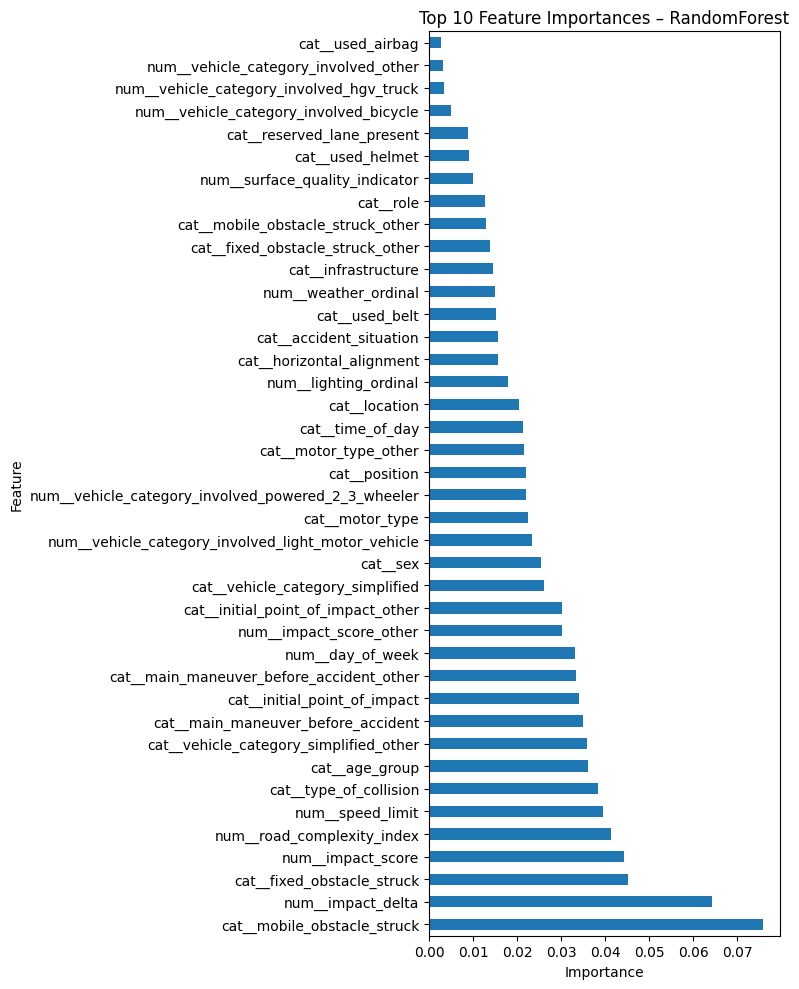

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

rf = rf_clf.named_steps["model"]
pre = rf_clf.named_steps["preprocess"]
feature_names = pre.get_feature_names_out()

importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8, 10))
forest_importances.nlargest(40).plot(kind="barh")
plt.title("Top 10 Feature Importances – RandomForest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

rf_base = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(
            random_state=42,
            n_jobs=-1
        ))
    ]
)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1],
    "max_features": ["sqrt", "log2"]
}

for n in param_grid["n_estimators"]:
    for depth in param_grid["max_depth"]:
        for split in param_grid["min_samples_split"]:
            for leaf in param_grid["min_samples_leaf"]:
                for mf in param_grid["max_features"]:
                    
                    # Pipeline mit diesen Hyperparametern
                    rf_clf = Pipeline(
                        steps=[
                            ("preprocess", preprocessor),
                            ("model", RandomForestClassifier(
                                n_estimators=n,
                                max_depth=depth,
                                min_samples_split=split,
                                min_samples_leaf=leaf,
                                max_features=mf,
                                random_state=42,
                                n_jobs=-1
                            ))
                        ]
                    )

                    # Train nur auf Trainingsdaten
                    rf_clf.fit(X_train, y_train)

                    # Bewertung auf Validation-Set
                    y_val_pred = rf_clf.predict(x_val)
                    score = f1_score(y_val, y_val_pred, average="macro")
                    # alternativ: score = rf_clf.score(X_val, y_val)  # Accuracy

                    if score > best_score:
                        best_score = score
                        best_params = {
                            "n_estimators": n,
                            "max_depth": depth,
                            "min_samples_split": split,
                            "min_samples_leaf": leaf,
                            "max_features": mf
                        }

print("🔝 Best Validation F1_macro:", best_score)
print("🏆 Best Hyperparameters:", best_params)

🔝 Best Validation F1_macro: 0.6528296193261517
🏆 Best Hyperparameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [51]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1) Preprocessor: numerisch → MinMaxScaler (0–1), kategorisch → OneHotEncoder
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", MinMaxScaler(), num_cols),                         # skaliert num_cols auf [0, 1]
#         ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  # one-hot für cat_cols
#     ]
# )

preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),  # numerische Spalten skalieren (0–1)
        ("cat", OrdinalEncoder(
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), cat_cols),                       # kategorische Spalten → Codes (kein One-Hot!)
    ]
)

# 2) Pipeline: Preprocessing + Decision Tree
dt_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", DecisionTreeClassifier(
            random_state=42,
            max_depth=15,        # kannst du z.B. auf 10–20 begrenzen
            min_samples_split=5,
            min_samples_leaf=20
        ))
    ]
)

# 3) Trainieren
dt_clf.fit(X_train, y_train)

# 4) Vorhersage & Auswertung
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     51051
           1       0.61      0.64      0.63     39476
           2       0.54      0.42      0.47     17440

    accuracy                           0.69    107967
   macro avg       0.64      0.62      0.63    107967
weighted avg       0.68      0.69      0.68    107967



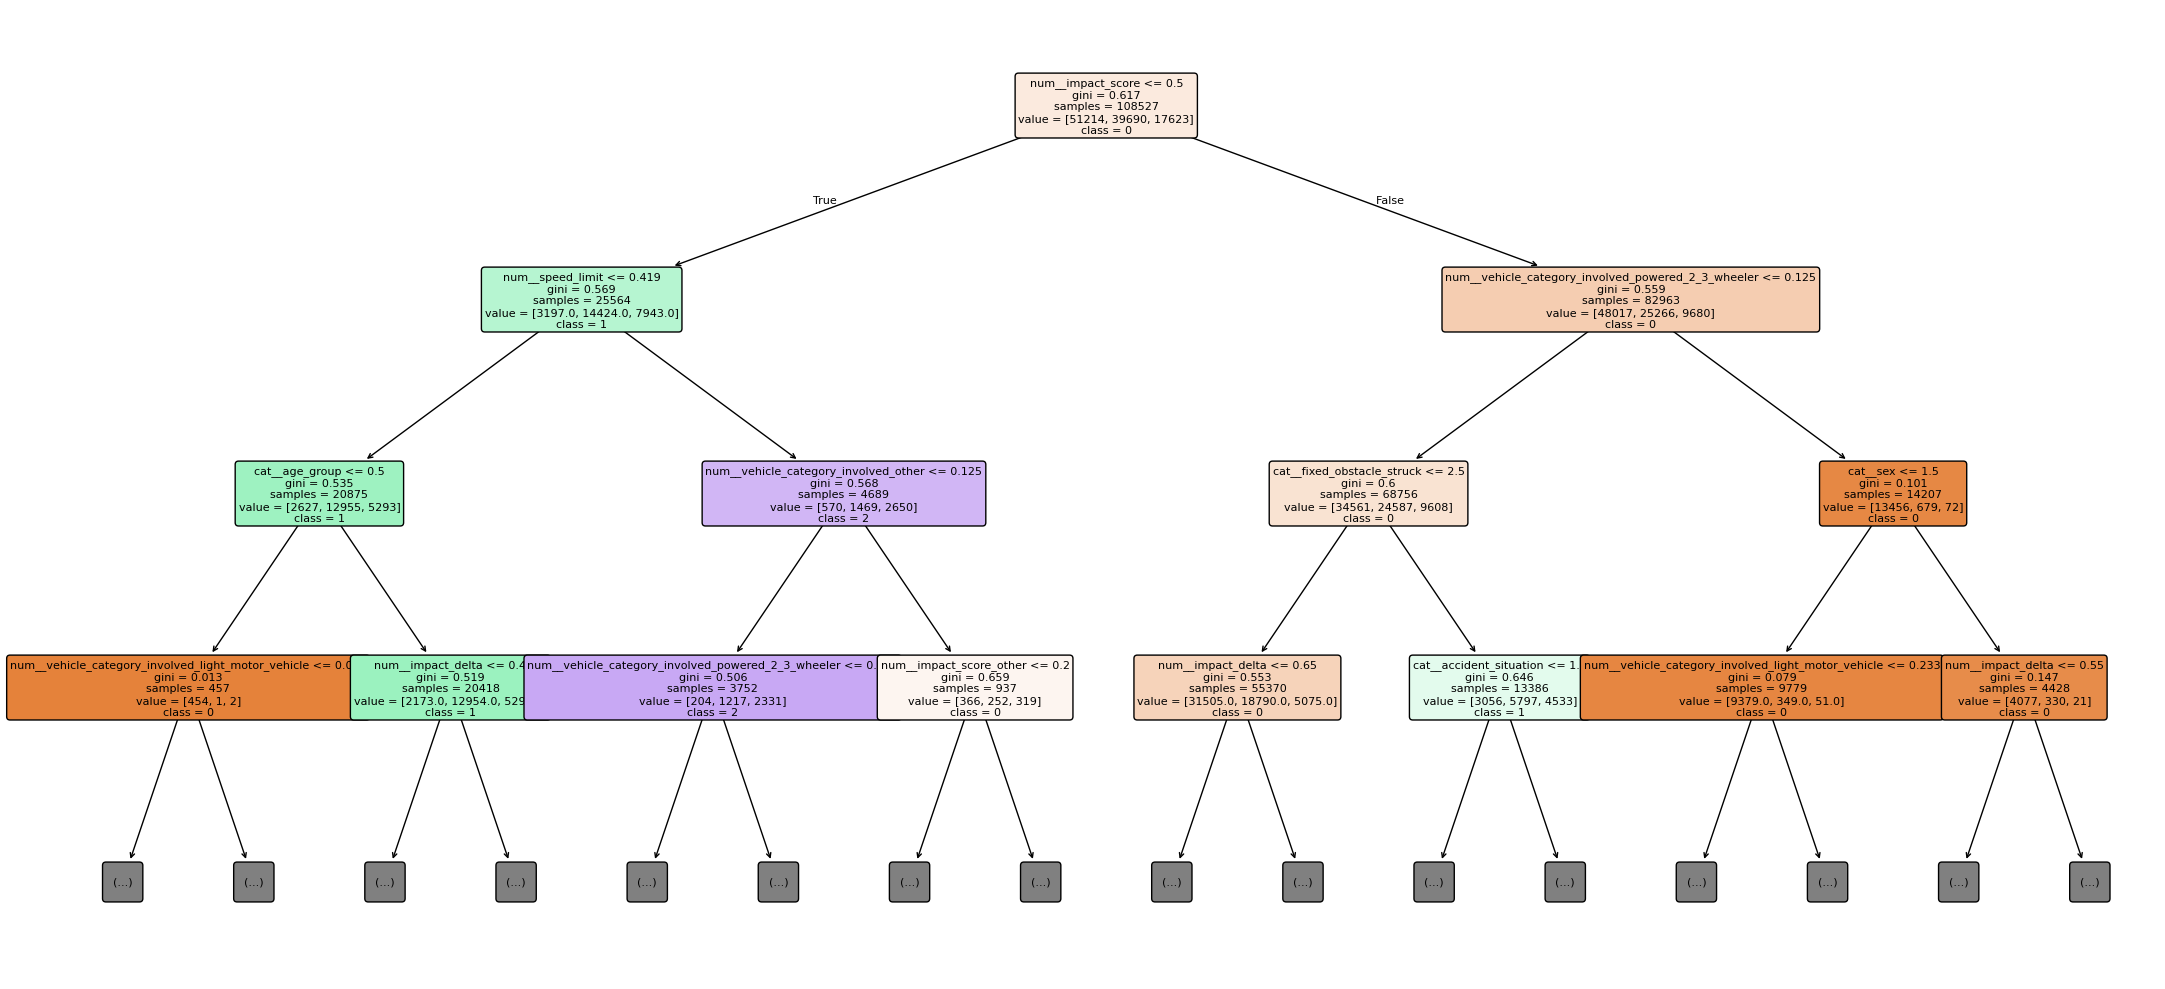

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt

# Einzelne Schritte aus der Pipeline holen
dt = dt_clf.named_steps["model"]          # DecisionTreeClassifier
pre = dt_clf.named_steps["preprocess"]    # ColumnTransformer

# Feature-Namen nach dem Preprocessing (inkl. One-Hot-Spalten)
feature_names = pre.get_feature_names_out()

# Klassen-Namen als Strings
class_names = [str(c) for c in dt.classes_]

# Plot
plt.figure(figsize=(22, 10))
tree.plot_tree(
    dt,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    max_depth=3,      # nur die oberen Ebenen anzeigen, sonst wird's riesig
    fontsize=8
)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

# --- HYPERPARAMETER GRID ---
param_grid = {
    "criterion": ["gini"],
    "max_depth": [5,10,15,20,30],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10 , 20]
}

best_params = None
best_score = -1

for crit in param_grid["criterion"]:
    for depth in param_grid["max_depth"]:
        for leaf in param_grid["min_samples_leaf"]:
            for split in param_grid["min_samples_split"]:
                
                model = Pipeline([
                    ("preprocess", preprocessor),      # dein OneHot + MinMaxScaler
                    ("model", DecisionTreeClassifier(
                        criterion=crit,
                        max_depth=depth,
                        min_samples_leaf=leaf,
                        min_samples_split=split,
                        random_state=42
                    ))
                ])

                # Trainiere nur auf Training
                model.fit(X_train, y_train)

                # Evaluiere nur auf Validation
                y_pred_val = model.predict(x_val)
                score = f1_score(y_val, y_pred_val, average="macro")

                if score > best_score:
                    best_score = score
                    best_params = {
                        "criterion": crit,
                        "max_depth": depth,
                        "min_samples_leaf": leaf,
                        "min_samples_split": split
                    }

print("Best Validation Score:", best_score)
print("Best Hyperparameters:", best_params)

Best Validation Score: 0.6315388144712731
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 20}
